In [1]:
import timeatlas as ta
import pandas as pd

Importing plotly failed. Interactive plots will not work.


## Grammar

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

---
# Univariate Prediction

To create a univariate prediction, let's populate a time series with a small set of values.

In [2]:
# Data Loading
my_series = pd.read_csv("../data/bbdata-weather/4652.csv")
my_series = pd.DataFrame(data=my_series["value"].values, 
                         index=pd.to_datetime(my_series["timestamp"]).values)
my_series.index = my_series.index.round("S")

In [3]:
# Create TimeSeries
ts = ta.TimeSeries(my_series)["2018"]

In [4]:
ts.boundaries()

(Timestamp('2018-01-01 00:02:44'), Timestamp('2018-12-31 23:55:58'))

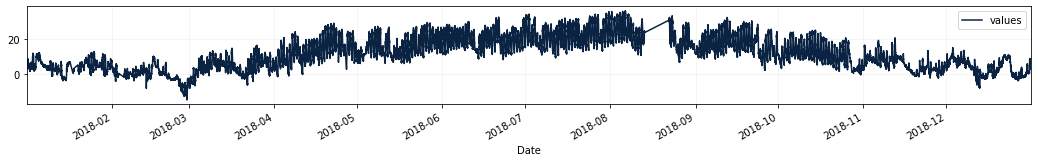

In [5]:
ts.plot()

In [6]:
## Model Creation
m = ta.models.Prophet()

In [7]:
## Fit the univariate time series
m.fit(ts)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


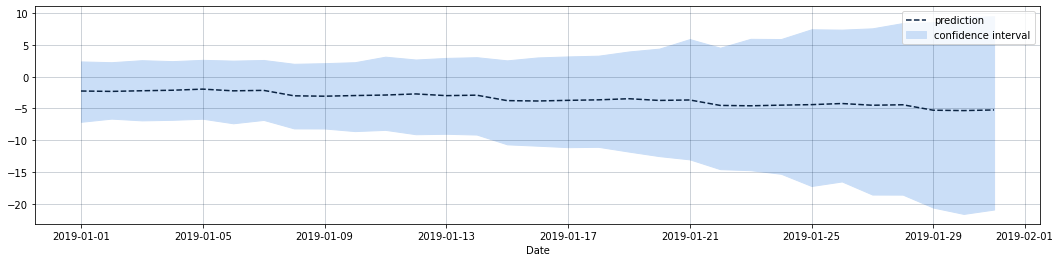

In [8]:
# Predict 4 days after the data's last time stamp
Y_hat = m.predict('30 days')
Y_hat.plot()

## Multivariate Prediction

In [4]:
# Temperature
ts_1 = pd.read_csv("../data/bbdata-weather/4652.csv")
ts_1 = pd.DataFrame(data=ts_1["value"].values, 
                         index=pd.to_datetime(ts_1["timestamp"]).values)
ts_1.index = ts_1.index.round("S")
ts_1 = ta.TimeSeries(ts_1)

# Luminosity
ts_2 = pd.read_csv("../data/bbdata-weather/4914.csv")
ts_2 = pd.DataFrame(data=ts_2["value"].values, 
                         index=pd.to_datetime(ts_2["timestamp"]).values)
ts_2.index = ts_2.index.round("S")
ts_2 = ta.TimeSeries(ts_2)

# Create the TSD
tsd = ta.TimeSeriesDataset([ts_1, ts_2])

In [5]:
tsd.boundaries()

[(Timestamp('2016-02-14 14:03:33'), Timestamp('2019-10-17 12:56:41')),
 (Timestamp('2015-12-05 00:00:00'), Timestamp('2020-12-02 09:10:24'))]

In [6]:
tsd = tsd.resample("min", method="pad").regularize("][")

In [7]:
tsd.boundaries()

[(Timestamp('2016-02-14 14:03:33', freq='T'),
  Timestamp('2019-10-17 12:56:33', freq='T')),
 (Timestamp('2016-02-14 14:04:00', freq='T'),
  Timestamp('2019-10-17 12:56:00', freq='T'))]

In [8]:
tsd["2017"]

<class 'list'>


2

In [9]:
arr = [1,2,3,4,5]
v = 1
test = slice(v)
print(test)
arr[test]

slice(None, 1, None)


[1]

In [10]:
arr = [1,2,3,4,5]
v = 1
test = slice(v)
print(test)
arr[test]

slice(None, 1, None)


[1]

In [11]:
arr = [1,2,3,4,5]
v = 0
test = slice(v)
print(test)
arr[slice(0, 1, None)]

slice(None, 0, None)


[1]

In [12]:
tsd["2017",0].data

<class 'list'>


TypeError: 'float' object is not subscriptable

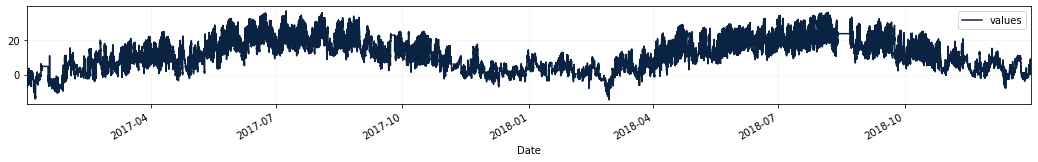

In [10]:
tsd["2017":"2018"].data[0].plot()

In [8]:
X_train, X_test = tsd.split_at("01-07-2018")

In [9]:
## Model Creation
m = ta.models.Prophet()

In [10]:
m.fit(X_train, 0)

ValueError: Found NaN in column '1'

In [13]:
ts = multivariate_model.predict(X_test)

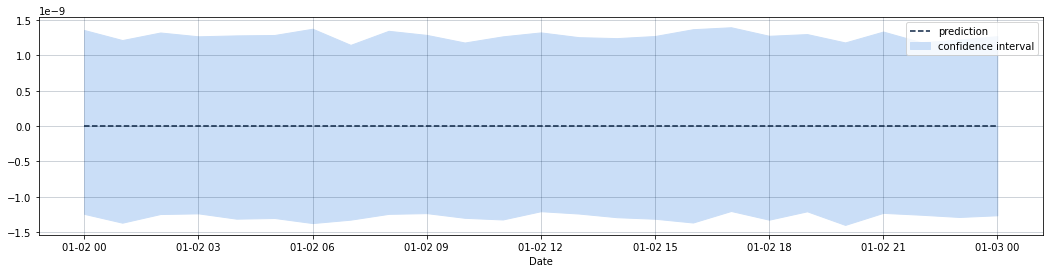

In [15]:
ts.plot()